In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [76]:
df = pd.read_csv('employee.csv')

In [77]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [78]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

#Some null values present in the dataset

In [79]:
df.shape

(9, 7)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [81]:
df.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

# 2. Reset the index as "name".

In [82]:
df = pd.read_csv('employee.csv',index_col = 'name')

In [83]:
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [84]:
df.loc[["Jack Morgan", "Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [85]:
subsetDataFrame = df[df['department'].isin(['Sales', 'Finance']) ]
subsetDataFrame

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [86]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [87]:
df[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [91]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [89]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

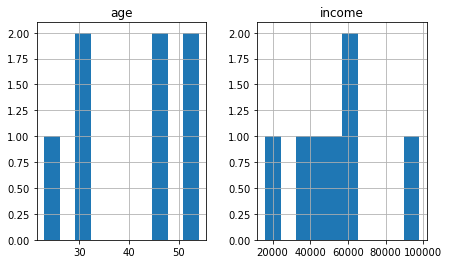

In [92]:
data = df[['age','income']]
data.hist(figsize=(7,4))
plt.show()

In [93]:
df['age']= df['age'].fillna(df['age'].median())
df['income']= df['income'].fillna(df['income'].median())

In [102]:
df['gender'] = df['gender'].fillna(df['gender'].mode().loc[0])

In [103]:
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Box plot of performance_score')

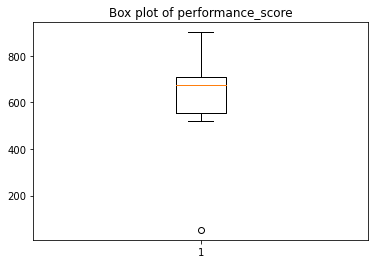

In [105]:
plt.boxplot(df['performance_score'])
plt.title('Box plot of performance_score')

In [106]:
Q1 = np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(df['performance_score'],75,interpolation='midpoint')

In [107]:
IQR = Q3-Q1

In [108]:
low_lim = Q1-1.5*IQR
upper_lim =Q3+1.5*IQR

In [109]:
print(low_lim)
print(upper_lim)

323.5
943.5


In [111]:
Outlier = []
for i in df['performance_score']:
        if((i<low_lim) or(i>upper_lim)):
            Outlier.append(i)

In [112]:
Outlier

[53]

In [113]:
ind = df['performance_score']<low_lim
df.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [114]:
df.drop(['James Authur'],inplace=True)

Text(0.5, 1.0, 'Box plot of performance_score')

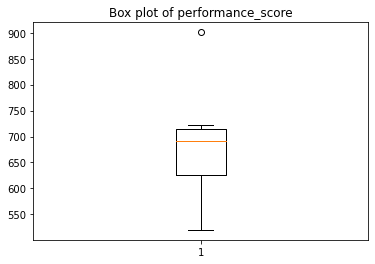

In [115]:
plt.boxplot(df['performance_score'])
plt.title('Box plot of performance_score')

# 9. Check the gender column and do Dummy encoding.

In [128]:
df2 = pd.get_dummies(df, columns=['gender'])

In [129]:
df2.head()

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0


# 10.Do the standard scaling on the feature performance score.

In [155]:
from sklearn import preprocessing

In [158]:
X = pd.DataFrame(df['performance_score'])

In [159]:
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)

In [161]:
X = pd.DataFrame(X)

In [162]:
X.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
